# Data Explanation

Targets:
- h1n1_vaccine - Whether respondent received H1N1 flu vaccine.
- seasonal_vaccine - Whether respondent received seasonal flu vaccine.

Predictors:
- h1n1_concern - Level of concern about the H1N1 flu.
        0 = Not at all concerned; 1 = Not very concerned; 2 = Somewhat concerned; 3 = Very concerned.
- h1n1_knowledge - Level of knowledge about H1N1 flu.
        0 = No knowledge; 1 = A little knowledge; 2 = A lot of knowledge.
- behavioral_antiviral_meds - Has taken antiviral medications. (binary)
- behavioral_avoidance - Has avoided close contact with others with flu-like symptoms. (binary)
- behavioral_face_mask - Has bought a face mask. (binary)
- behavioral_wash_hands - Has frequently washed hands or used hand sanitizer. (binary)
- behavioral_large_gatherings - Has reduced time at large gatherings. (binary)
- behavioral_outside_home - Has reduced contact with people outside of own household. (binary)
- behavioral_touch_face - Has avoided touching eyes, nose, or mouth. (binary)
- doctor_recc_h1n1 - H1N1 flu vaccine was recommended by doctor. (binary)
- doctor_recc_seasonal - Seasonal flu vaccine was recommended by doctor. (binary)
- chronic_med_condition - Has any of the following chronic medical conditions: asthma or an other lung condition, diabetes, a heart condition, a kidney condition, sickle cell anemia or other anemia, a neurological or neuromuscular condition, a liver condition, or a weakened immune system caused by a chronic illness or by medicines taken for a chronic illness. (binary)
- child_under_6_months - Has regular close contact with a child under the age of six months. (binary)
- health_worker - Is a healthcare worker. (binary)
- health_insurance - Has health insurance. (binary)
- opinion_h1n1_vacc_effective - Respondent's opinion about H1N1 vaccine effectiveness.
        1 = Not at all effective; 2 = Not very effective; 3 = Don't know; 4 = Somewhat effective; 5 = Very effective.
- opinion_h1n1_risk - Respondent's opinion about risk of getting sick with H1N1 flu without vaccine.
        1 = Very Low; 2 = Somewhat low; 3 = Don't know; 4 = Somewhat high; 5 = Very high.
- opinion_h1n1_sick_from_vacc - Respondent's worry of getting sick from taking H1N1 vaccine.
        1 = Not at all worried; 2 = Not very worried; 3 = Don't know; 4 = Somewhat worried; 5 = Very worried.
- opinion_seas_vacc_effective - Respondent's opinion about seasonal flu vaccine effectiveness.
        1 = Not at all effective; 2 = Not very effective; 3 = Don't know; 4 = Somewhat effective; 5 = Very effective.
- opinion_seas_risk - Respondent's opinion about risk of getting sick with seasonal flu without vaccine.
        1 = Very Low; 2 = Somewhat low; 3 = Don't know; 4 = Somewhat high; 5 = Very high.
- opinion_seas_sick_from_vacc - Respondent's worry of getting sick from taking seasonal flu vaccine.
        1 = Not at all worried; 2 = Not very worried; 3 = Don't know; 4 = Somewhat worried; 5 = Very worried.
- age_group - Age group of respondent. 
- education - Self-reported education level.
- race - Race of respondent.
- sex - Sex of respondent.
- income_poverty - Household annual income of respondent with respect to 2008 Census poverty thresholds.
- marital_status - Marital status of respondent.
- rent_or_own - Housing situation of respondent.
- employment_status - Employment status of respondent.
- hhs_geo_region - Respondent's residence using a 10-region geographic classification defined by the U.S. Dept. of Health and Human Services. Values are represented as short random character strings.
- census_msa - Respondent's residence within metropolitan statistical areas (MSA) as defined by the U.S. Census.
- household_adults - Number of other adults in household, top-coded to 3.
- household_children - Number of children in household, top-coded to 3.
- employment_industry - Type of industry respondent is employed in. Values are represented as short random character strings.
- employment_occupation - Type of occupation of respondent. Values are represented as short random character strings.

## Import Resources

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xlrd
import os
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV,\
cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier,\
ExtraTreesClassifier, VotingClassifier, StackingRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [2]:
df_features = pd.read_csv('Data/training_set_features.csv')
df_targets = pd.read_csv('Data/training_set_labels.csv')

In [3]:
df=df_features.merge(df_targets)

In [4]:
df.columns

Index(['respondent_id', 'h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation', 'h1n1_vaccine', 'seasonal_vaccine'],
      dtype='object')

In [5]:
df.describe()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,h1n1_vaccine,seasonal_vaccine
count,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,...,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000,26707.000000,26707.000000
mean,13353.000000,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,...,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583,0.212454,0.465608
std,7709.791156,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,...,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173,0.409052,0.498825
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,...,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,...,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,...,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000,0.000000,1.000000
max,26706.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000,1.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [7]:
df.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


In [8]:
for c in df.columns:
    print("---- %s ---" % c)
    print(df[c].value_counts())

---- respondent_id ---
2047     1
7657     1
3371     1
13612    1
15661    1
        ..
12979    1
2740     1
693      1
6838     1
0        1
Name: respondent_id, Length: 26707, dtype: int64
---- h1n1_concern ---
2.0    10575
1.0     8153
3.0     4591
0.0     3296
Name: h1n1_concern, dtype: int64
---- h1n1_knowledge ---
1.0    14598
2.0     9487
0.0     2506
Name: h1n1_knowledge, dtype: int64
---- behavioral_antiviral_meds ---
0.0    25335
1.0     1301
Name: behavioral_antiviral_meds, dtype: int64
---- behavioral_avoidance ---
1.0    19228
0.0     7271
Name: behavioral_avoidance, dtype: int64
---- behavioral_face_mask ---
0.0    24847
1.0     1841
Name: behavioral_face_mask, dtype: int64
---- behavioral_wash_hands ---
1.0    22015
0.0     4650
Name: behavioral_wash_hands, dtype: int64
---- behavioral_large_gatherings ---
0.0    17073
1.0     9547
Name: behavioral_large_gatherings, dtype: int64
---- behavioral_outside_home ---
0.0    17644
1.0     8981
Name: behavioral_outside_home, d

## Preprocessing

In [9]:
df.isna().sum()

respondent_id                      0
h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
m

In [10]:
# Missing Data
drop = ['respondent_id', 'doctor_recc_seasonal', 'opinion_seas_vacc_effective', 'opinion_seas_risk',
                'opinion_seas_sick_from_vacc', 'seasonal_vaccine', 'employment_industry', 'employment_occupation']

# Impute with most frequent
most_frequent = ['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds', 'behavioral_avoidance', 
                'behavioral_face_mask', 'behavioral_wash_hands', 'behavioral_large_gatherings', 
                'behavioral_outside_home', 'behavioral_touch_face', 'doctor_recc_h1n1', 'chronic_med_condition',
                'child_under_6_months', 'health_worker', 'health_insurance', 'opinion_h1n1_vacc_effective',
                'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc', 'income_poverty', 'marital_status',
                'rent_or_own', 'employment_status', 'household_adults', 'household_children', 'education']

# Encoding and scaling
cat_cols = ['age_group', 'education', 'race', 'sex', 'income_poverty', 'marital_status', 'rent_or_own', 'employment_status',
       'hhs_geo_region', 'census_msa']

num_cols = ['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds', 'behavioral_avoidance', 
                'behavioral_face_mask', 'behavioral_wash_hands', 'behavioral_large_gatherings', 
                'behavioral_outside_home', 'behavioral_touch_face', 'doctor_recc_h1n1', 'chronic_med_condition',
                'child_under_6_months', 'health_worker', 'health_insurance', 'opinion_h1n1_vacc_effective',
                'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc',
                'household_adults', 'household_children']

In [11]:
df = df.drop(drop, axis =1)

In [12]:
X = df.drop('h1n1_vaccine', axis = 1)
y = df['h1n1_vaccine']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

In [13]:
X_train = X_train.fillna(df.mode().iloc[0])
X_test = X_test.fillna(df.mode().iloc[0])

In [14]:
ct = ColumnTransformer(transformers = [
    ('ohe', OneHotEncoder(drop = 'first'), cat_cols),
    ('scaler', MinMaxScaler(), num_cols)
], remainder = 'passthrough')

In [15]:
ct.fit(X_train)
X_train_trans = ct.transform(X_train)
X_test_trans = ct.transform(X_test)

In [16]:
ohe_col_names = ct.named_transformers_['ohe'].get_feature_names(input_features = cat_cols)

In [17]:
X_train_trans = pd.DataFrame(X_train_trans,
             columns = [*ohe_col_names, *num_cols], # Using * to unpack lists
             index = X_train.index)

X_test_trans = pd.DataFrame(X_test_trans,
             columns = [*ohe_col_names, *num_cols], # Using * to unpack lists
             index = X_test.index)

In [18]:
X_train_trans.describe()

,age_group_35 - 44 Years,age_group_45 - 54 Years,age_group_55 - 64 Years,age_group_65+ Years,education_< 12 Years,education_College Graduate,education_Some College,race_Hispanic,race_Other or Multiple,race_White,...,doctor_recc_h1n1,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,household_adults,household_children
count,21365.000000,21365.000000,21365.000000,21365.000000,21365.000000,21365.000000,21365.00000,21365.000000,21365.000000,21365.000000,...,21365.000000,21365.000000,21365.000000,21365.000000,21365.000000,21365.000000,21365.000000,21365.000000,21365.000000,21365.000000
mean,0.142944,0.195834,0.208799,0.255277,0.087760,0.430049,0.26520,0.066136,0.061877,0.794477,...,0.203651,0.274561,0.079616,0.110414,0.935081,0.712790,0.335174,0.338942,0.296653,0.176940
std,0.350024,0.396851,0.406460,0.436027,0.282953,0.495094,0.44145,0.248526,0.240937,0.404093,...,0.402722,0.446303,0.270704,0.313413,0.246389,0.250402,0.319782,0.338335,0.250323,0.308851
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.500000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.750000,0.250000,0.250000,0.333333,0.000000
75%,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.00000,0.000000,0.000000,1.000000,...,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.750000,0.750000,0.333333,0.333333
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [19]:
X_train_trans_corr = X_train_trans.corr()
X_train_trans_corr


,age_group_35 - 44 Years,age_group_45 - 54 Years,age_group_55 - 64 Years,age_group_65+ Years,education_< 12 Years,education_College Graduate,education_Some College,race_Hispanic,race_Other or Multiple,race_White,...,doctor_recc_h1n1,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,household_adults,household_children
age_group_35 - 44 Years,1.000000,-0.201535,-0.209797,-0.239104,-0.034038,0.088764,-0.019363,0.052205,0.022772,-0.051074,...,0.004666,-0.085249,0.010301,0.039167,-0.016139,-0.017282,0.036853,0.030482,0.037584,0.369461
age_group_45 - 54 Years,-0.201535,1.000000,-0.253509,-0.288922,-0.040513,0.023746,0.011864,-0.007932,0.001521,-0.000027,...,-0.012909,-0.024780,-0.008764,0.031246,-0.010712,0.008214,0.007333,0.016948,0.065558,0.037049
age_group_55 - 64 Years,-0.209797,-0.253509,1.000000,-0.300767,-0.033576,0.031297,-0.002102,-0.057010,-0.025348,0.051251,...,0.019592,0.050363,-0.009005,0.029557,0.013837,0.016439,-0.004398,-0.009197,-0.038508,-0.218125
age_group_65+ Years,-0.239104,-0.288922,-0.300767,1.000000,0.087395,-0.097895,-0.022470,-0.092742,-0.047441,0.107571,...,-0.006054,0.161287,-0.077419,-0.106250,0.125510,0.004585,-0.056075,-0.042149,-0.217832,-0.304492
education_< 12 Years,-0.034038,-0.040513,-0.033576,0.087395,1.000000,-0.269423,-0.186336,0.159082,0.015778,-0.153780,...,-0.013903,0.061603,0.041383,-0.065992,-0.088139,-0.028725,0.053696,0.074678,0.013509,0.007804
education_College Graduate,0.088764,0.023746,0.031297,-0.097895,-0.269423,1.000000,-0.521846,-0.078236,0.008819,0.089221,...,0.007948,-0.103941,-0.043486,0.060788,0.124123,0.061313,-0.007563,-0.068728,-0.009059,0.051102
education_Some College,-0.019363,0.011864,-0.002102,-0.022470,-0.186336,-0.521846,1.000000,-0.022496,0.001499,0.010888,...,0.021093,0.032628,0.008968,0.045805,-0.015995,-0.024736,-0.015782,0.003699,0.009528,-0.006481
race_Hispanic,0.052205,-0.007932,-0.057010,-0.092742,0.159082,-0.078236,-0.022496,1.000000,-0.068346,-0.523225,...,0.015546,-0.036273,0.053226,-0.013831,-0.120982,-0.015736,0.081660,0.091475,0.094171,0.154679
race_Other or Multiple,0.022772,0.001521,-0.025348,-0.047441,0.015778,0.008819,0.001499,-0.068346,1.000000,-0.504946,...,0.002785,-0.009999,-0.004487,-0.005559,-0.019063,-0.025066,0.015279,0.038999,0.039962,0.021440
race_White,-0.051074,-0.000027,0.051251,0.107571,-0.153780,0.089221,0.010888,-0.523225,-0.504946,1.000000,...,-0.016041,0.013651,-0.039968,0.009916,0.108571,0.043072,-0.058409,-0.116731,-0.059259,-0.122661


In [20]:
df_corr = df.corr()
df_corr

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,household_adults,household_children,h1n1_vaccine
h1n1_concern,1.000000,0.062522,0.090301,0.233713,0.156032,0.293565,0.255031,0.246424,0.248016,0.150206,0.095162,0.049574,0.033562,-0.003655,0.239604,0.377033,0.360070,-0.015658,0.050525,0.121929
h1n1_knowledge,0.062522,1.000000,-0.010836,0.088839,0.030050,0.089785,-0.048898,-0.068219,0.086162,0.093829,-0.022602,0.021598,0.170252,0.119408,0.121009,0.073086,-0.019501,0.024874,0.050583,0.117951
behavioral_antiviral_meds,0.090301,-0.010836,1.000000,0.049247,0.146261,0.064119,0.106287,0.127679,0.070868,0.051235,0.008465,0.028788,0.009465,-0.063988,0.030211,0.105163,0.079091,0.044900,0.084822,0.040608
behavioral_avoidance,0.233713,0.088839,0.049247,1.000000,0.064946,0.338130,0.227675,0.220348,0.335335,0.068145,0.039435,-0.000414,0.001180,0.032662,0.112300,0.117851,0.131405,0.019122,0.040328,0.047690
behavioral_face_mask,0.156032,0.030050,0.146261,0.064946,1.000000,0.083363,0.180907,0.163382,0.104335,0.084282,0.068113,0.039726,0.069992,-0.040257,0.037651,0.131165,0.107129,0.013991,0.005826,0.070498
behavioral_wash_hands,0.293565,0.089785,0.064119,0.338130,0.083363,1.000000,0.195364,0.192619,0.365064,0.088729,0.030260,0.036188,0.053761,0.031919,0.136987,0.168711,0.150024,0.009669,0.047764,0.074712
behavioral_large_gatherings,0.255031,-0.048898,0.106287,0.227675,0.180907,0.195364,1.000000,0.584085,0.253683,0.082242,0.104721,0.021168,-0.032319,-0.059000,0.052299,0.126463,0.185924,-0.031938,-0.009449,0.017822
behavioral_outside_home,0.246424,-0.068219,0.127679,0.220348,0.163382,0.192619,0.584085,1.000000,0.267719,0.070346,0.098858,0.018195,-0.034619,-0.061381,0.050748,0.125549,0.174834,-0.027527,-0.009558,0.021768
behavioral_touch_face,0.248016,0.086162,0.070868,0.335335,0.104335,0.365064,0.253683,0.267719,1.000000,0.088221,0.028876,0.026640,0.067648,0.011024,0.104126,0.146080,0.131772,-0.000553,0.023606,0.071648
doctor_recc_h1n1,0.150206,0.093829,0.051235,0.068145,0.084282,0.088729,0.082242,0.070346,0.088221,1.000000,0.158275,0.079389,0.101639,0.067157,0.152305,0.262826,0.113111,0.004112,0.029040,0.393890


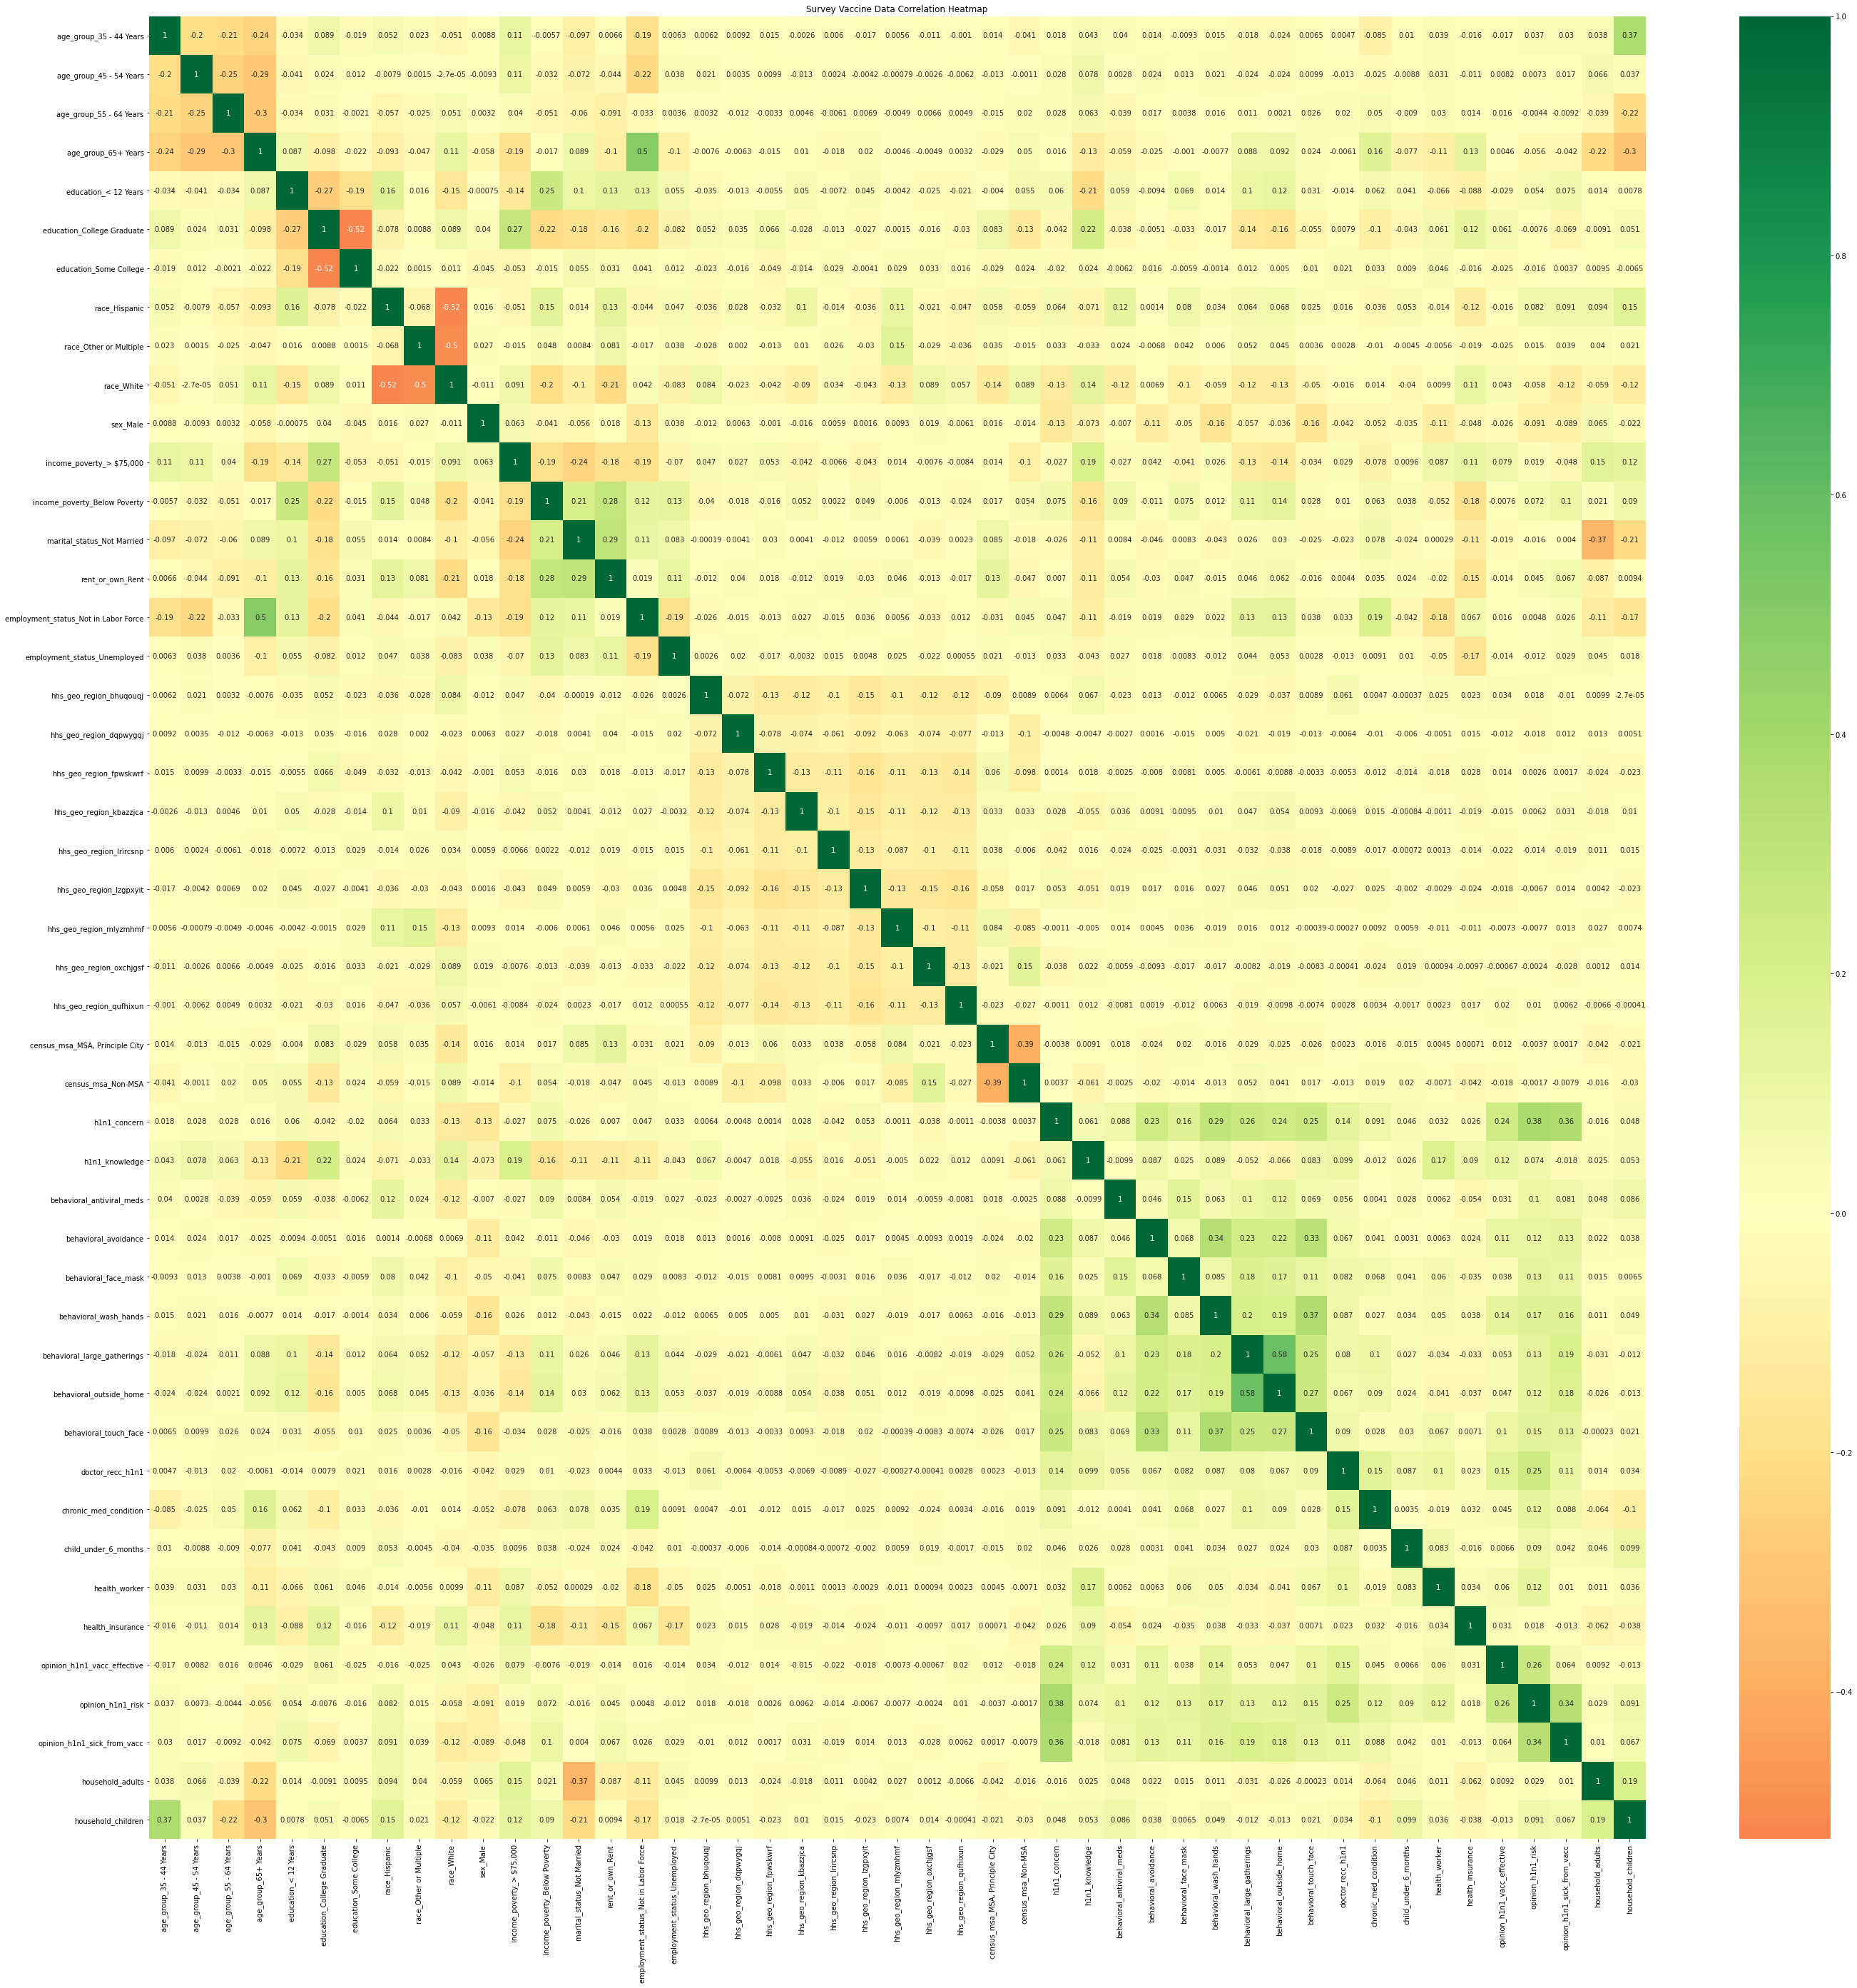

In [21]:
plt.figure(figsize = (47,47))
sns.heatmap(X_train_trans_corr, center = 0, annot= True, cmap = "RdYlGn" )
plt.title("Survey Vaccine Data Correlation Heatmap")
plt.show()

In [22]:
#Checking what columns have a strong relationship with the target h1n1_vaccine.

h1n1_corr = df.corr()['h1n1_vaccine'].sort_values(ascending = False)
h1n1_corr

h1n1_vaccine                   1.000000
doctor_recc_h1n1               0.393890
opinion_h1n1_risk              0.323265
opinion_h1n1_vacc_effective    0.269347
health_worker                  0.169768
h1n1_concern                   0.121929
health_insurance               0.121170
h1n1_knowledge                 0.117951
chronic_med_condition          0.095207
opinion_h1n1_sick_from_vacc    0.075091
behavioral_wash_hands          0.074712
behavioral_touch_face          0.071648
behavioral_face_mask           0.070498
child_under_6_months           0.066962
behavioral_avoidance           0.047690
behavioral_antiviral_meds      0.040608
behavioral_outside_home        0.021768
behavioral_large_gatherings    0.017822
household_adults               0.007545
household_children            -0.003320
Name: h1n1_vaccine, dtype: float64

EDA Visualizations

In [23]:
counts = (df[['h1n1_concern', 'h1n1_vaccine']]
              .groupby(['h1n1_concern', 'h1n1_vaccine'])
              .size()
              .unstack('h1n1_vaccine')
         )
counts


h1n1_vaccine,0,1
h1n1_concern,,
0.0,2849,447
1.0,6756,1397
2.0,8102,2473
3.0,3250,1341


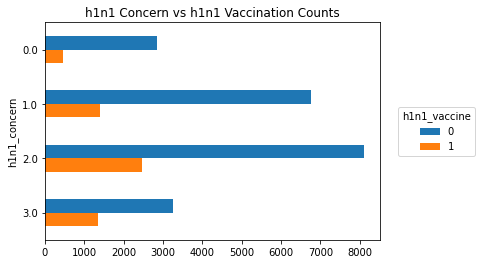

In [24]:
ax = counts.plot.barh()
ax.invert_yaxis()
ax.set_title("h1n1 Concern vs h1n1 Vaccination Counts")
ax.legend(
    loc='center right', 
    bbox_to_anchor=(1.3, 0.5), 
    title='h1n1_vaccine'
)

In [25]:
#Since the Two classes are imbalanced, we'll just see vaccinated observations as a smaller number at every level of h1n1_concern.
#We will look at the rate of vaccination for each level of h1n1_concern.

h1n1_concern_counts = counts.sum(axis='columns')
h1n1_concern_counts

h1n1_concern
0.0     3296
1.0     8153
2.0    10575
3.0     4591
dtype: int64

In [26]:
props = counts.div(h1n1_concern_counts, axis='index')
props

h1n1_vaccine,0,1
h1n1_concern,,
0.0,0.864381,0.135619
1.0,0.828652,0.171348
2.0,0.766147,0.233853
3.0,0.707907,0.292093


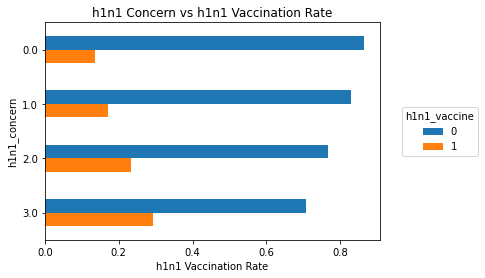

In [27]:
ax = props.plot.barh()
ax.invert_yaxis()
ax.set_title("h1n1 Concern vs h1n1 Vaccination Rate")
ax.set_xlabel("h1n1 Vaccination Rate")
ax.legend(
    loc='center left', 
    bbox_to_anchor=(1.05, 0.5),
    title='h1n1_vaccine'
)

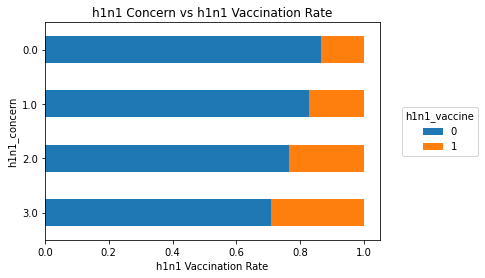

In [28]:
#Visually, we can better see that more people are likely to get the h1n1 vaccine if they have a higher level of concern. 
#stacked bar chart another way to visually read this info. 

ax = props.plot.barh(stacked=True)
ax.invert_yaxis()
ax.set_title("h1n1 Concern vs h1n1 Vaccination Rate")
ax.set_xlabel("h1n1 Vaccination Rate")
ax.legend(
    loc='center left', 
    bbox_to_anchor=(1.05, 0.5),
    title='h1n1_vaccine'
)

In [29]:
h1n1_knowledge_counts = (df[['h1n1_knowledge', 'h1n1_vaccine']]
              .groupby(['h1n1_knowledge', 'h1n1_vaccine'])
              .size()
              .unstack('h1n1_vaccine')
         )
h1n1_knowledge_counts

h1n1_vaccine,0,1
h1n1_knowledge,,
0.0,2145,361
1.0,11945,2653
2.0,6849,2638


In [30]:
h1n1_knowledge_total_counts = h1n1_knowledge_counts.sum(axis='columns')
h1n1_knowledge_total_counts

h1n1_knowledge
0.0     2506
1.0    14598
2.0     9487
dtype: int64

In [31]:
h1n1_knowledge_props = h1n1_knowledge_counts.div(h1n1_knowledge_total_counts, axis='index')
h1n1_knowledge_props

h1n1_vaccine,0,1
h1n1_knowledge,,
0.0,0.855946,0.144054
1.0,0.818263,0.181737
2.0,0.721935,0.278065


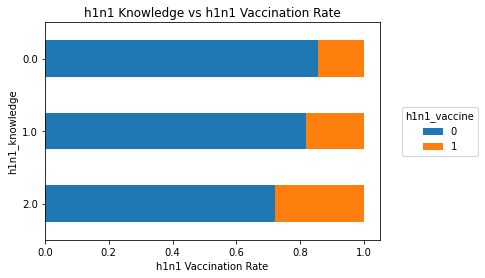

In [32]:
ax = h1n1_knowledge_props.plot.barh(stacked=True)
ax.invert_yaxis()
ax.set_title("h1n1 Knowledge vs h1n1 Vaccination Rate")
ax.set_xlabel("h1n1 Vaccination Rate")
ax.legend(
    loc='center left', 
    bbox_to_anchor=(1.05, 0.5),
    title='h1n1_vaccine'
)

In [33]:
opinion_h1n1_vacc_effective_counts = (df[['opinion_h1n1_vacc_effective', 'h1n1_vaccine']]
              .groupby(['opinion_h1n1_vacc_effective', 'h1n1_vaccine'])
              .size()
              .unstack('h1n1_vaccine')
         )
opinion_h1n1_vacc_effective_counts

h1n1_vaccine,0,1
opinion_h1n1_vacc_effective,,
1.0,844,42
2.0,1763,95
3.0,4224,499
4.0,9622,2061
5.0,4265,2901


In [34]:
opinion_h1n1_vacc_effective_total_counts = opinion_h1n1_vacc_effective_counts.sum(axis='columns')
opinion_h1n1_vacc_effective_total_counts

opinion_h1n1_vacc_effective
1.0      886
2.0     1858
3.0     4723
4.0    11683
5.0     7166
dtype: int64

In [35]:
opinion_h1n1_vacc_effective_props = opinion_h1n1_vacc_effective_counts.div(opinion_h1n1_vacc_effective_total_counts, axis='index')
opinion_h1n1_vacc_effective_props

h1n1_vaccine,0,1
opinion_h1n1_vacc_effective,,
1.0,0.952596,0.047404
2.0,0.948870,0.051130
3.0,0.894347,0.105653
4.0,0.823590,0.176410
5.0,0.595172,0.404828


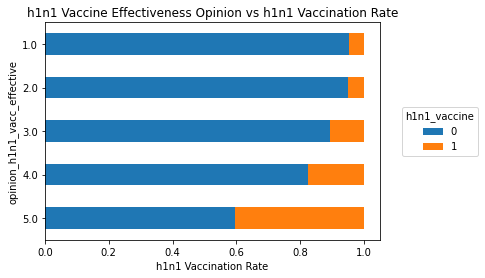

In [36]:
ax = opinion_h1n1_vacc_effective_props.plot.barh(stacked=True)
ax.invert_yaxis()
ax.set_title("h1n1 Vaccine Effectiveness Opinion vs h1n1 Vaccination Rate")
ax.set_xlabel("h1n1 Vaccination Rate")
ax.legend(
    loc='center left', 
    bbox_to_anchor=(1.05, 0.5),
    title='h1n1_vaccine'
)

In [37]:
opinion_h1n1_risk_counts = (df[['opinion_h1n1_risk', 'h1n1_vaccine']]
              .groupby(['opinion_h1n1_risk', 'h1n1_vaccine'])
              .size()
              .unstack('h1n1_vaccine')
         )
opinion_h1n1_risk_counts

h1n1_vaccine,0,1
opinion_h1n1_risk,,
1.0,7420,719
2.0,8253,1666
3.0,923,194
4.0,3279,2115
5.0,856,894


In [38]:
opinion_h1n1_risk_total_counts = opinion_h1n1_risk_counts.sum(axis='columns')
opinion_h1n1_risk_total_counts

opinion_h1n1_risk
1.0    8139
2.0    9919
3.0    1117
4.0    5394
5.0    1750
dtype: int64

In [39]:
opinion_h1n1_risk_props = opinion_h1n1_risk_counts.div(opinion_h1n1_risk_total_counts, axis='index')
opinion_h1n1_risk_props

h1n1_vaccine,0,1
opinion_h1n1_risk,,
1.0,0.911660,0.088340
2.0,0.832040,0.167960
3.0,0.826321,0.173679
4.0,0.607898,0.392102
5.0,0.489143,0.510857


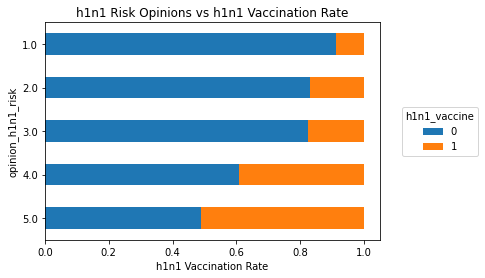

In [40]:
ax = opinion_h1n1_risk_props.plot.barh(stacked=True)
ax.invert_yaxis()
ax.set_title("h1n1 Risk Opinions vs h1n1 Vaccination Rate")
ax.set_xlabel("h1n1 Vaccination Rate")
ax.legend(
    loc='center left', 
    bbox_to_anchor=(1.05, 0.5),
    title='h1n1_vaccine'
)

In [41]:
opinion_h1n1_sick_from_vacc_counts = (df[['opinion_h1n1_sick_from_vacc', 'h1n1_vaccine']]
              .groupby(['opinion_h1n1_sick_from_vacc', 'h1n1_vaccine'])
              .size()
              .unstack('h1n1_vaccine')
         )
opinion_h1n1_sick_from_vacc_counts

h1n1_vaccine,0,1
opinion_h1n1_sick_from_vacc,,
1.0,7157,1841
2.0,7548,1581
3.0,136,12
4.0,4304,1546
5.0,1574,613


In [42]:
opinion_h1n1_sick_from_vacc_total_counts = opinion_h1n1_sick_from_vacc_counts.sum(axis='columns')
opinion_h1n1_sick_from_vacc_total_counts

opinion_h1n1_sick_from_vacc
1.0    8998
2.0    9129
3.0     148
4.0    5850
5.0    2187
dtype: int64

In [43]:
opinion_h1n1_sicks_from_vacc_props = opinion_h1n1_sick_from_vacc_counts.div(opinion_h1n1_sick_from_vacc_total_counts, axis='index')
opinion_h1n1_sicks_from_vacc_props

h1n1_vaccine,0,1
opinion_h1n1_sick_from_vacc,,
1.0,0.795399,0.204601
2.0,0.826816,0.173184
3.0,0.918919,0.081081
4.0,0.735726,0.264274
5.0,0.719707,0.280293


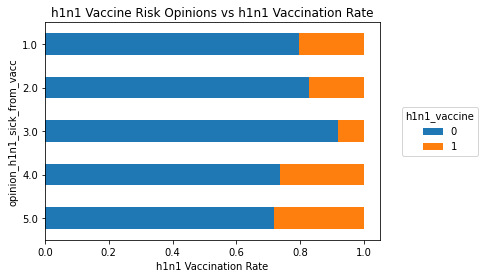

In [44]:
ax = opinion_h1n1_sicks_from_vacc_props.plot.barh(stacked=True)
ax.invert_yaxis()
ax.set_title("h1n1 Vaccine Risk Opinions vs h1n1 Vaccination Rate")
ax.set_xlabel("h1n1 Vaccination Rate")
ax.legend(
    loc='center left', 
    bbox_to_anchor=(1.05, 0.5),
    title='h1n1_vaccine'
)

In [45]:
#Will most likely graph one by one. the fancy function. But will still try the fancy function. 

#Attempt at a Vaccination rate plot function to see more variable visualizations

def vaccination_rate_plot(col, target, data, ax=None):
    counts = (df[[target, col]]
                  .groupby([target, col])
                  .size()
                  .unstack(target)
             )
    group_counts = counts.sum(axis='columns')
    props = counts.div(group_counts, axis='index')

    props.plot(kind="barh", stacked=True, ax=ax)
    ax.invert_yaxis()
    ax.legend().remove()

In [46]:
cols_to_plot = [
    'h1n1_concern',
    'h1n1_knowledge',
    'opinion_h1n1_vacc_effective',
    'opinion_h1n1_risk',
    'opinion_h1n1_sick_from_vacc'
    'sex'
    'age_group'
    'race',
    ]



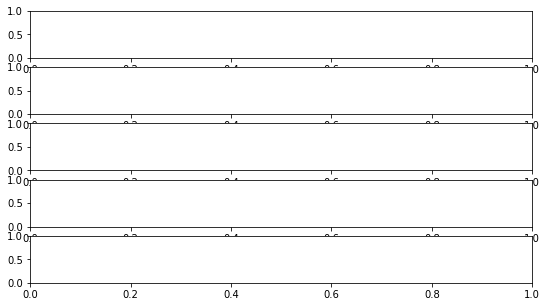

In [47]:
fig, ax = plt.subplots(
    len(cols_to_plot),1, figsize = (9, len(cols_to_plot)))

In [48]:
for idx, col in enumerate(cols_to_plot):
    vaccination_rate_plot(
    col, 'h1n1_vaccine', df, ax=ax[idx,0])

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed